In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from abelfunctions import RiemannTheta

import layers as layers
import model as mdl

import warnings
warnings.filterwarnings('ignore')

from costfunctions import mse
import minimizer

from mathtools import rtbm_probability

import scipy

/usr/lib/sagemath/local/lib/python2.7/site-packages/traitlets/traitlets.py:770: DeprecationWarning: A parent of InlineBackend._config_changed has adopted the new @observe(change) API
  clsname, change_or_name), DeprecationWarning)


In [2]:
# Generate input grid
X = np.linspace(-10,10, 101)
X = X.reshape((1,X.shape[0]))

# P(v) plots

# Phase I

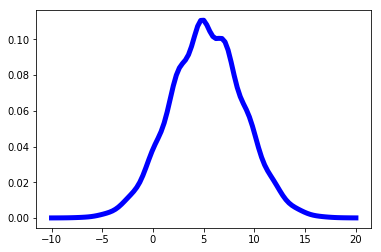

In [51]:
# Setup and plot expectation
Q = np.diag([5.1])
T = np.diag([0.9])

Bv = np.zeros((1,1))
Bv[0,0] = -0.2

Bh = np.zeros((1,1))
Bh[0,0] = 0.5

W = np.zeros((1,1))
W[0,0] = 2.05

X = np.linspace(-10,20, 101)
X = X.reshape((1,X.shape[0]))

P=rtbm_probability(X, Bv, Bh, T, W, Q)

plt.plot(X.flatten(), P[0],"b-", linewidth='5')

In [53]:
scipy.integrate.quad(lambda x: np.real(rtbm_probability(np.array([[x]]), Bv, Bh, T, W, Q)[0][0]), -40, 40)

(0.9780228578437893, 5.494502905126653e-09)

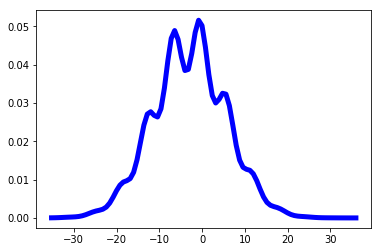

In [54]:
Q = np.diag([8,2.2])
T = np.diag([1.1])

Bv = np.zeros((1,1))
Bv[0,0] = -0.2

Bh = np.zeros((2,1))
Bh[0,0] = 0.5
Bh[1,0] = -0.5

W = np.zeros((1,2))
W[0,0] = 1.25
W[0,1] = 1.4

X = np.linspace(-40,40, 101)
X = X.reshape((1,X.shape[0]))

P=rtbm_probability(X, Bv, Bh, T, W, Q)

plt.plot(X.flatten(), P[0],"b-", linewidth='5')

In [55]:
scipy.integrate.quad(lambda x: np.real(rtbm_probability(np.array([[x]]), Bv, Bh, T, W, Q)[0][0]), -40, 40)

(nan, nan)

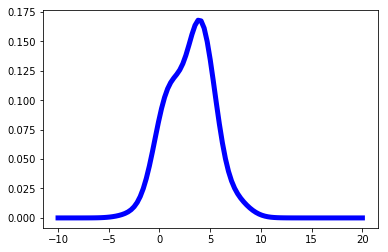

In [56]:
Q = np.diag([8,2.8])
T = np.diag([1.1])

Bv = np.zeros((1,1))
Bv[0,0] = -0.2

Bh = np.zeros((2,1))
Bh[0,0] = 0.5
Bh[1,0] = -0.5

W = np.zeros((1,2))
W[0,0] = 1.6
W[0,1] = -1.3

X = np.linspace(-10,20, 101)
X = X.reshape((1,X.shape[0]))

P=rtbm_probability(X, Bv, Bh, T, W, Q)

plt.plot(X.flatten(), P[0],"b-", linewidth='5')

In [57]:
scipy.integrate.quad(lambda x: np.real(rtbm_probability(np.array([[x]]), Bv, Bh, T, W, Q)[0][0]), -20, 20)

(0.9819824727655193, 8.357100803876227e-09)

# Phase II

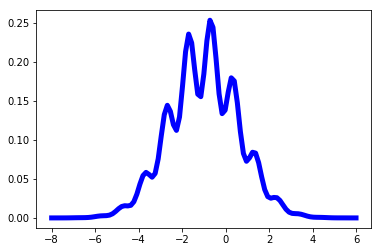

In [58]:
# WHERE IS A PROBLEM WITH THE NORMALIATION !

Q = np.diag([4.1])
T = np.diag([0.4])

Bv = np.zeros((1,1))
Bv[0,0] = 0.4

Bh = np.zeros((1,1), dtype=complex)
Bh[0,0] = 4j

W = np.zeros((1,1), dtype=complex)
W[0,0] = 6j

X = np.linspace(-8,6, 101)
X = X.reshape((1,X.shape[0]))

P=rtbm_probability(X, Bv, Bh, T, W, Q)

plt.plot(X.flatten(), np.real(P[0]),"b-", linewidth='5')

In [59]:
scipy.integrate.quad(lambda x: np.real(rtbm_probability(np.array([[x]]), Bv, Bh, T, W, Q)[0][0]), -8, 8)

(0.818726655121251, 1.3059525751713282e-08)

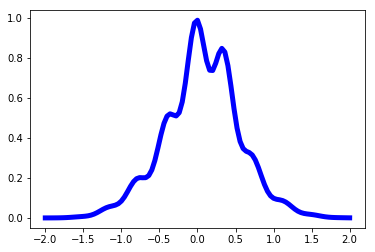

In [60]:
Q = np.diag([5,4.8])
T = np.diag([3.8])

Bv = np.zeros((1,1))
Bv[0,0] = -0.2

Bh = np.zeros((2,1), dtype=complex)
Bh[0,0] = 0.5j
Bh[1,0] = -0.7j

W = np.zeros((1,2), dtype=complex)
W[0,0] = 15.6j
W[0,1] = 4.3j

X = np.linspace(-2,2, 101)
X = X.reshape((1,X.shape[0]))

P=rtbm_probability(X, Bv, Bh, T, W, Q)

plt.plot(X.flatten(), np.real(P[0]),"b-", linewidth='5')

In [61]:
scipy.integrate.quad(lambda x: np.real(rtbm_probability(np.array([[x]]), Bv, Bh, T, W, Q)[0][0]), -2, 2)

(0.9946554657848238, 1.5321677070429786e-12)